In [8]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [9]:
# Import Other
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

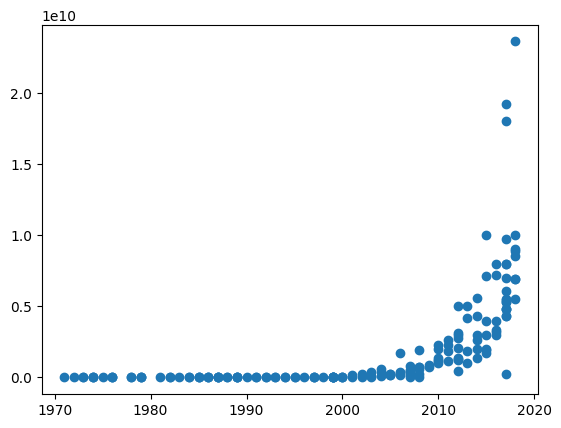

In [11]:
# Plot the data - exponential!
plt.scatter(X, y)

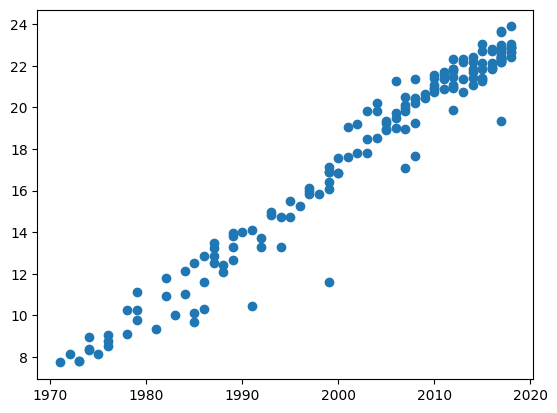

In [12]:
# Since we want a linear model, let's take the log
y = np.log(y)
plt.scatter(X, y)

In [13]:
# Let's also center the X data so the values are not too large
# We could scale it too, but then we'd have to reverse the transformation later
X = X - X.mean()

In [14]:
# TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# Learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 1ms/step - loss: 323.0142 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 364.5689 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 264.8578 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 206.8946 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 184.7372 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 121.0733 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 96.8265 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 78.3511 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 64.2200 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 47.8487 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 3

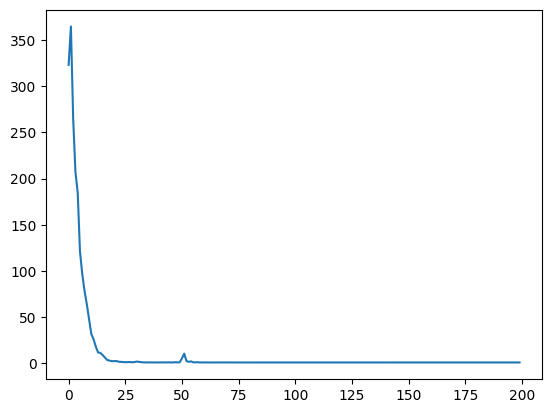

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [16]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33722773]], dtype=float32), array([17.752893], dtype=float32)]


In [17]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0, 0]

In [18]:
print("Time to double:", np.log(2) / a)

Time to double: 2.055427578764004


In [19]:
# If you know the analytical solution
X = np.array(X).flatten()
y = np.array(y)

denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator

print(a, b)
print("Time to double: ", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204


### Making Predictions

6/6 [==============================] - 0s 2ms/step


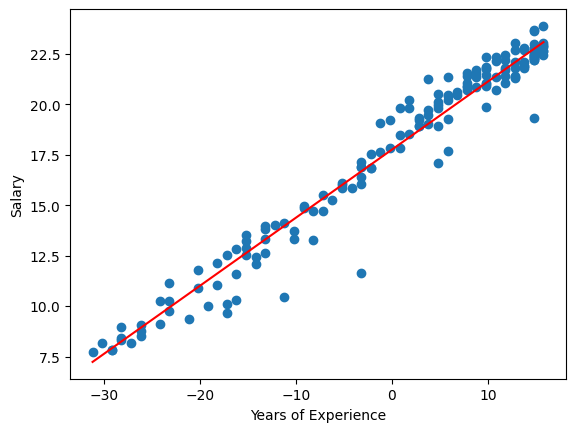

In [25]:
# Make sure the line fits our data
yhat = model.predict(X).flatten()
plt.scatter(X, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(X, yhat, color = "red")

In [21]:
# ! Manual Calculation [Revisit this section for better understanding.]

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N * 1) * (1 * 1) + (1) --> (N * 1)
yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(yhat, yhat2)

True